# Exploratory Data Analysys (EDA)
## Costumer loans dataset


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_valid = pd.read_csv("orig_valid.csv")
df_train = pd.read_csv("orig_train.csv")

In [3]:
print(len(df_valid))
print(len(df_train))

3235
15097


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [5]:
df_train.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [6]:
df_train.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


## Dataset Description
#### Variables in order:
**PRODUCT** - Type of financial product the client has  
**AGE** - age of client  
**AREA** - The geographical area where the client resides  
**RESIDENTAL_PLACE** -  Indicates whether the client owns their living place (with further distinction on having a mortgage or not), lives with family, or is renting  
**EDUCATION** - The highest level of education attained by the client  
**MARTIAL_STATUS** - Describes the client's marital status, including options such as single, married, divorced, or widowed  
**HOUSEHOLD_MEMBERS** - The number of people living in the client's household  
**NO_OF_DEPENDENTS** - The number of individuals financially dependent on the client  
**INCOME** - The client's monthly income  
**WORK_SENIORITY** - The total number of years the client has been working  
**LENGTH_RELATIONSHIP_WITH_CLIENT**	- The duration (in years) of the client's relationship with the bank  
**DEBIT_CARD**- wheter clinet owns a debit card or not  
**CURRENT_ACCOUNT** -  wheter client owns a current account  
**SAVING_ACCOUNT** - wheter client owns a saving account  
**SALARY_ACCOUNT** - Indicates whether the client has a salary account with the bank, designed for receiving payroll  
**FOREIGN_ACCOUNT** -  Whether the client holds any bank accounts in foreign countries  
**FINALIZED_LOAN** - The number of loans the client has fully repaid  
**DEPOSIT** -   Indicates whether the client has made any fixed or term deposits with the bank  
**PENSION_FUNDS** - Whether the client has invested in any pension funds through the bank  
**DEFAULT_FLAG** -A binary indicator (e.g., Yes/No, 1/0) showing whether the client has defaulted on any financial obligation 



## Rozkłady zmiennych numerycznych

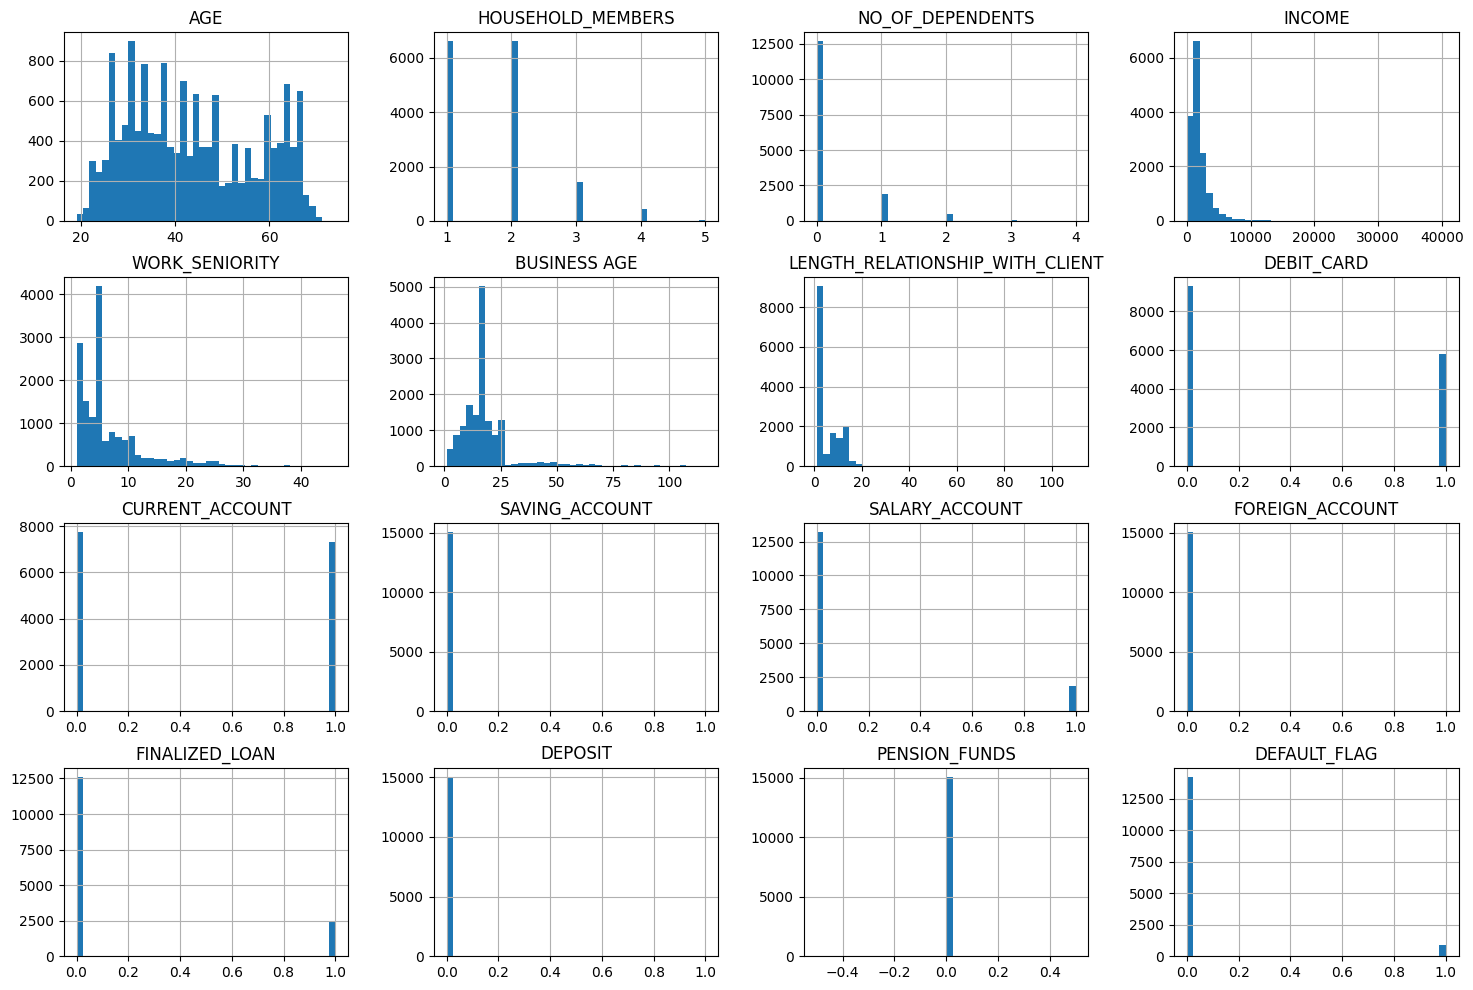

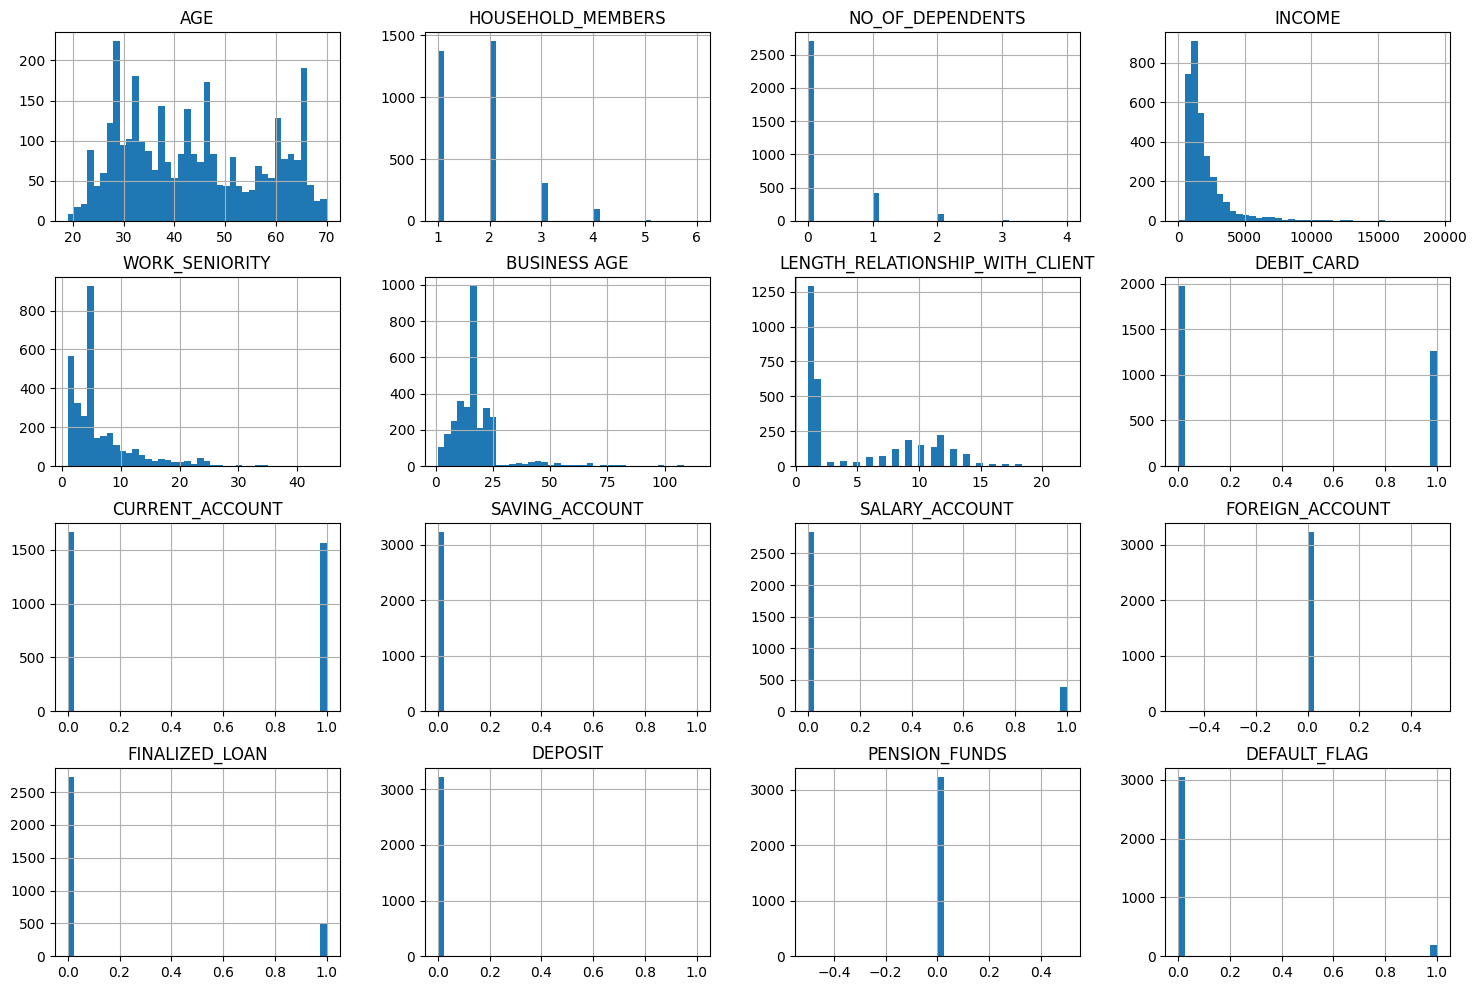

In [7]:
df_train.hist(bins = 40, figsize=(18, 12))
df_valid.hist(bins = 40, figsize=(18, 12))
plt.show()

## Rozkłady zmiennych kategorycznych

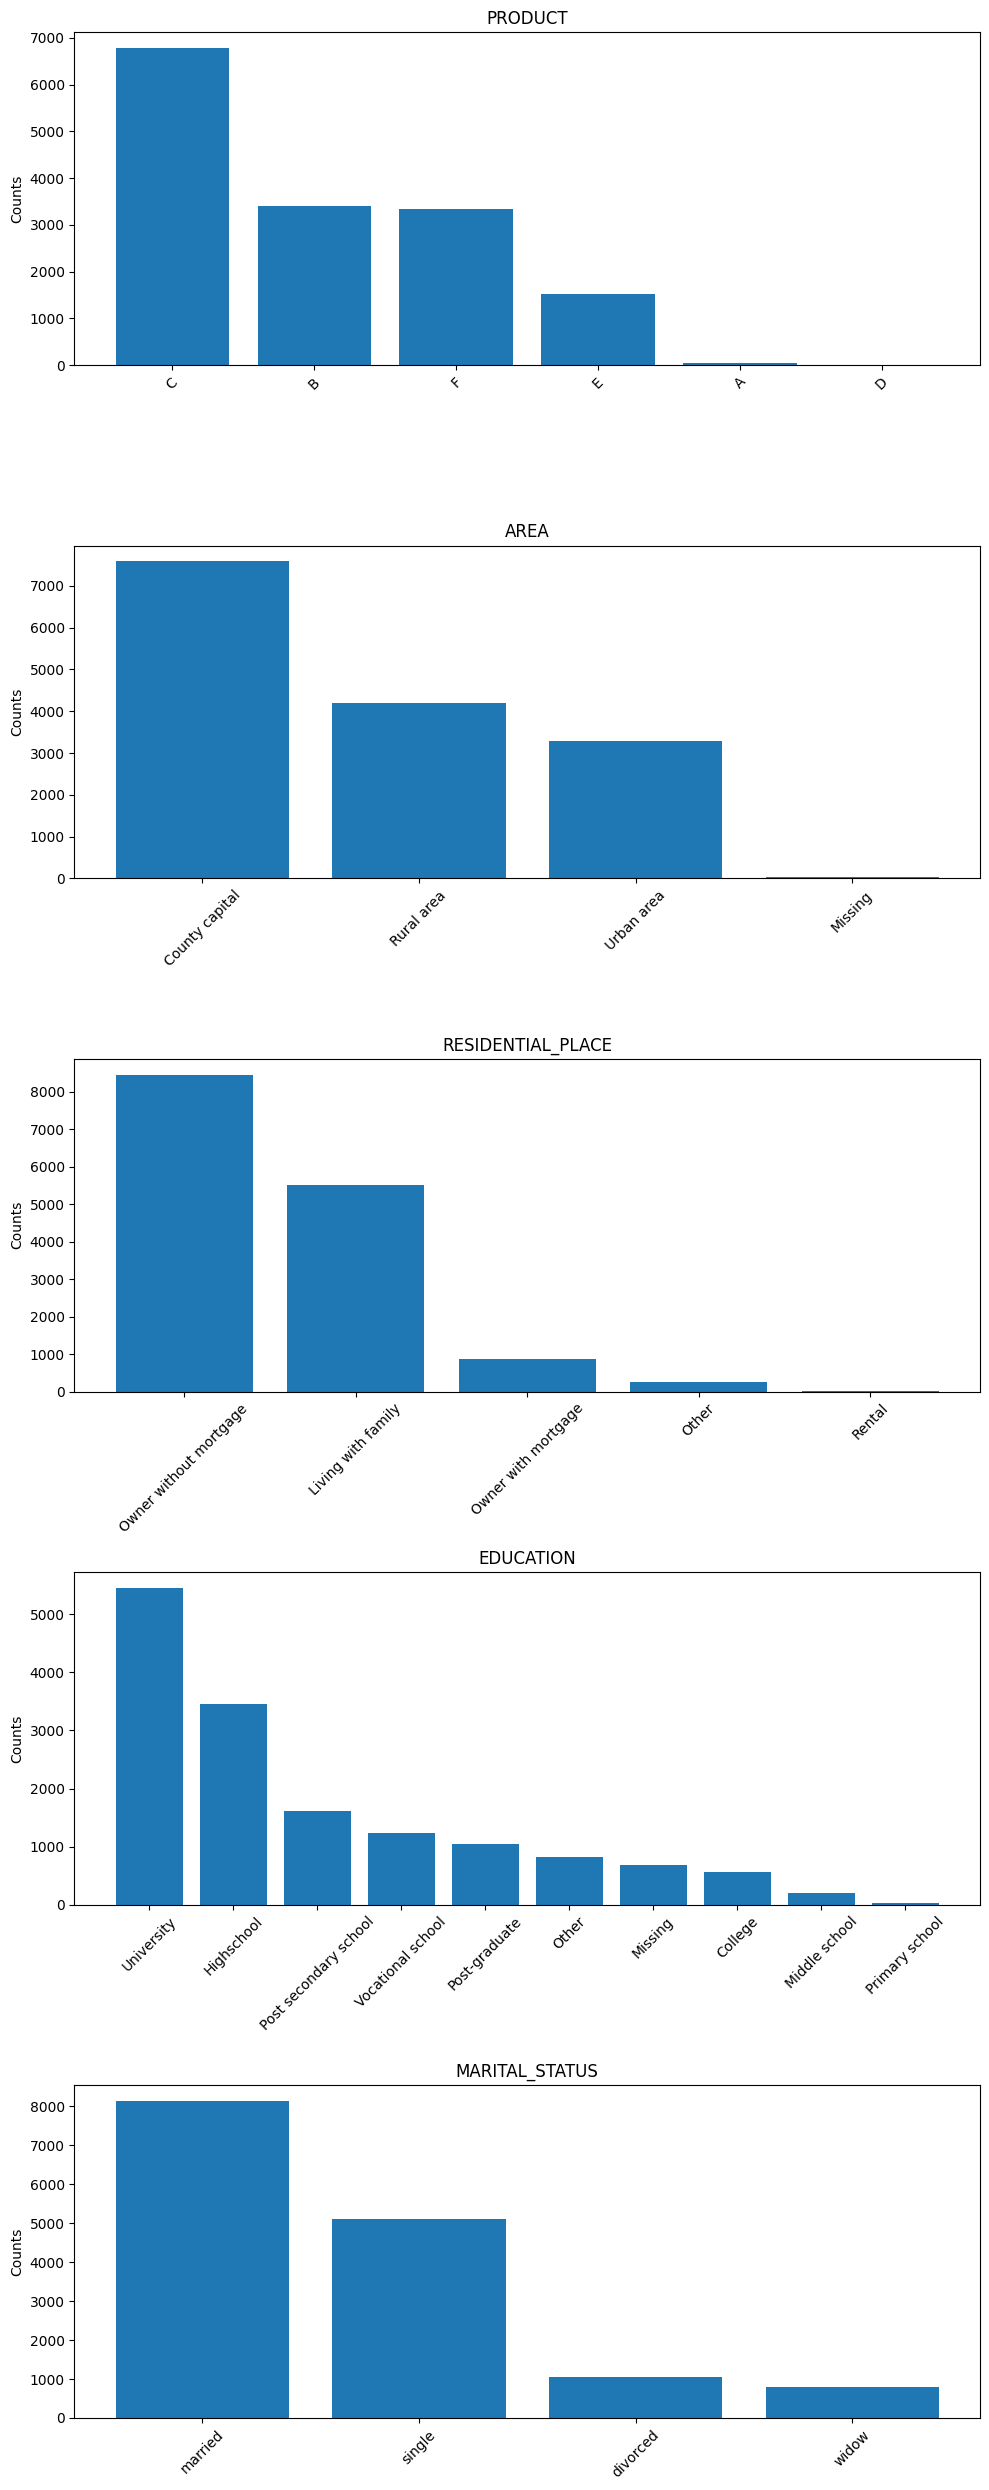

In [8]:
df_strings = df_train[["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]]
fig, axs = plt.subplots(nrows= 5, ncols=1, figsize=(10, 5 * 5))
for ax, column in zip(axs, ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]):
    value_counts = df_train[column].value_counts()
    ax.bar(value_counts.index.astype(str), value_counts.values)
    ax.set_title(column)
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()                         

In [9]:
elems = ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]
for elem in elems:
    print(df_train[elem].unique())


['C' 'F' 'B' 'E' 'D' 'A']
['County capital' 'Urban area' 'Rural area' 'Missing']
['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
['University' 'Post-graduate' 'Highschool' 'Missing'
 'Post secondary school' 'Other' 'College' 'Vocational school'
 'Middle school' 'Primary school']
['married' 'divorced' 'single' 'widow']


## zamiana zmiennych kategorycznych na numeryczne

In [10]:
df_train['MARITAL_STATUS'] = df_train['MARITAL_STATUS'].replace({'single': 1, 'married': 2, 'divorced': 3, 'widow': 4})
df_train['PRODUCT'] = df_train['PRODUCT'].replace({'A': 1, 'B': 2, "C": 3, "D": 4, "E": 5, "F": 6})
df_train['AREA'] = df_train['AREA'].replace({'County capital' : 3, 'Urban area' : 2, 'Rural area' : 1, 'Missing': 0})
df_train["RESIDENTIAL_PLACE"] = df_train['RESIDENTIAL_PLACE'].replace({'Owner without mortgage' : 4,'Living with family' : 3,'Owner with mortgage' : 2,
 'Rental' : 1, 'Other': 0})
df_train["EDUCATION"] = df_train['EDUCATION'].replace({'University' : 9, 'Post-graduate' : 8, 'Highschool' : 7,'Missing' : 6,
 'Post secondary school' : 5,'College' : 4,'Vocational school' : 3,'Middle school' : 2, 'Primary school' : 1, 'Other' : 0})
df_valid['MARITAL_STATUS'] = df_valid['MARITAL_STATUS'].replace({'single': 1, 'married': 2, 'divorced': 3, 'widow': 4})
df_valid['PRODUCT'] = df_valid['PRODUCT'].replace({'A': 1, 'B': 2, "C": 3, "D": 4, "E": 5, "F": 6})
df_valid['AREA'] = df_valid['AREA'].replace({'County capital' : 3, 'Urban area' : 2, 'Rural area' : 1, 'Missing': 0})
df_valid["RESIDENTIAL_PLACE"] = df_valid['RESIDENTIAL_PLACE'].replace({'Owner without mortgage' : 4,'Living with family' : 3,'Owner with mortgage' : 2,
 'Rental' : 1, 'Other': 0})
df_valid["EDUCATION"] = df_valid['EDUCATION'].replace({'University' : 9, 'Post-graduate' : 8, 'Highschool' : 7,'Missing' : 6,
 'Post secondary school' : 5,'College' : 4,'Vocational school' : 3,'Middle school' : 2, 'Primary school' : 1, 'Other' : 0})


df_train.head(20)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  int64  
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  int64  
 3   RESIDENTIAL_PLACE                15097 non-null  int64  
 4   EDUCATION                        15097 non-null  int64  
 5   MARITAL_STATUS                   15097 non-null  int64  
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

## Macierz Korelacji zmiennych

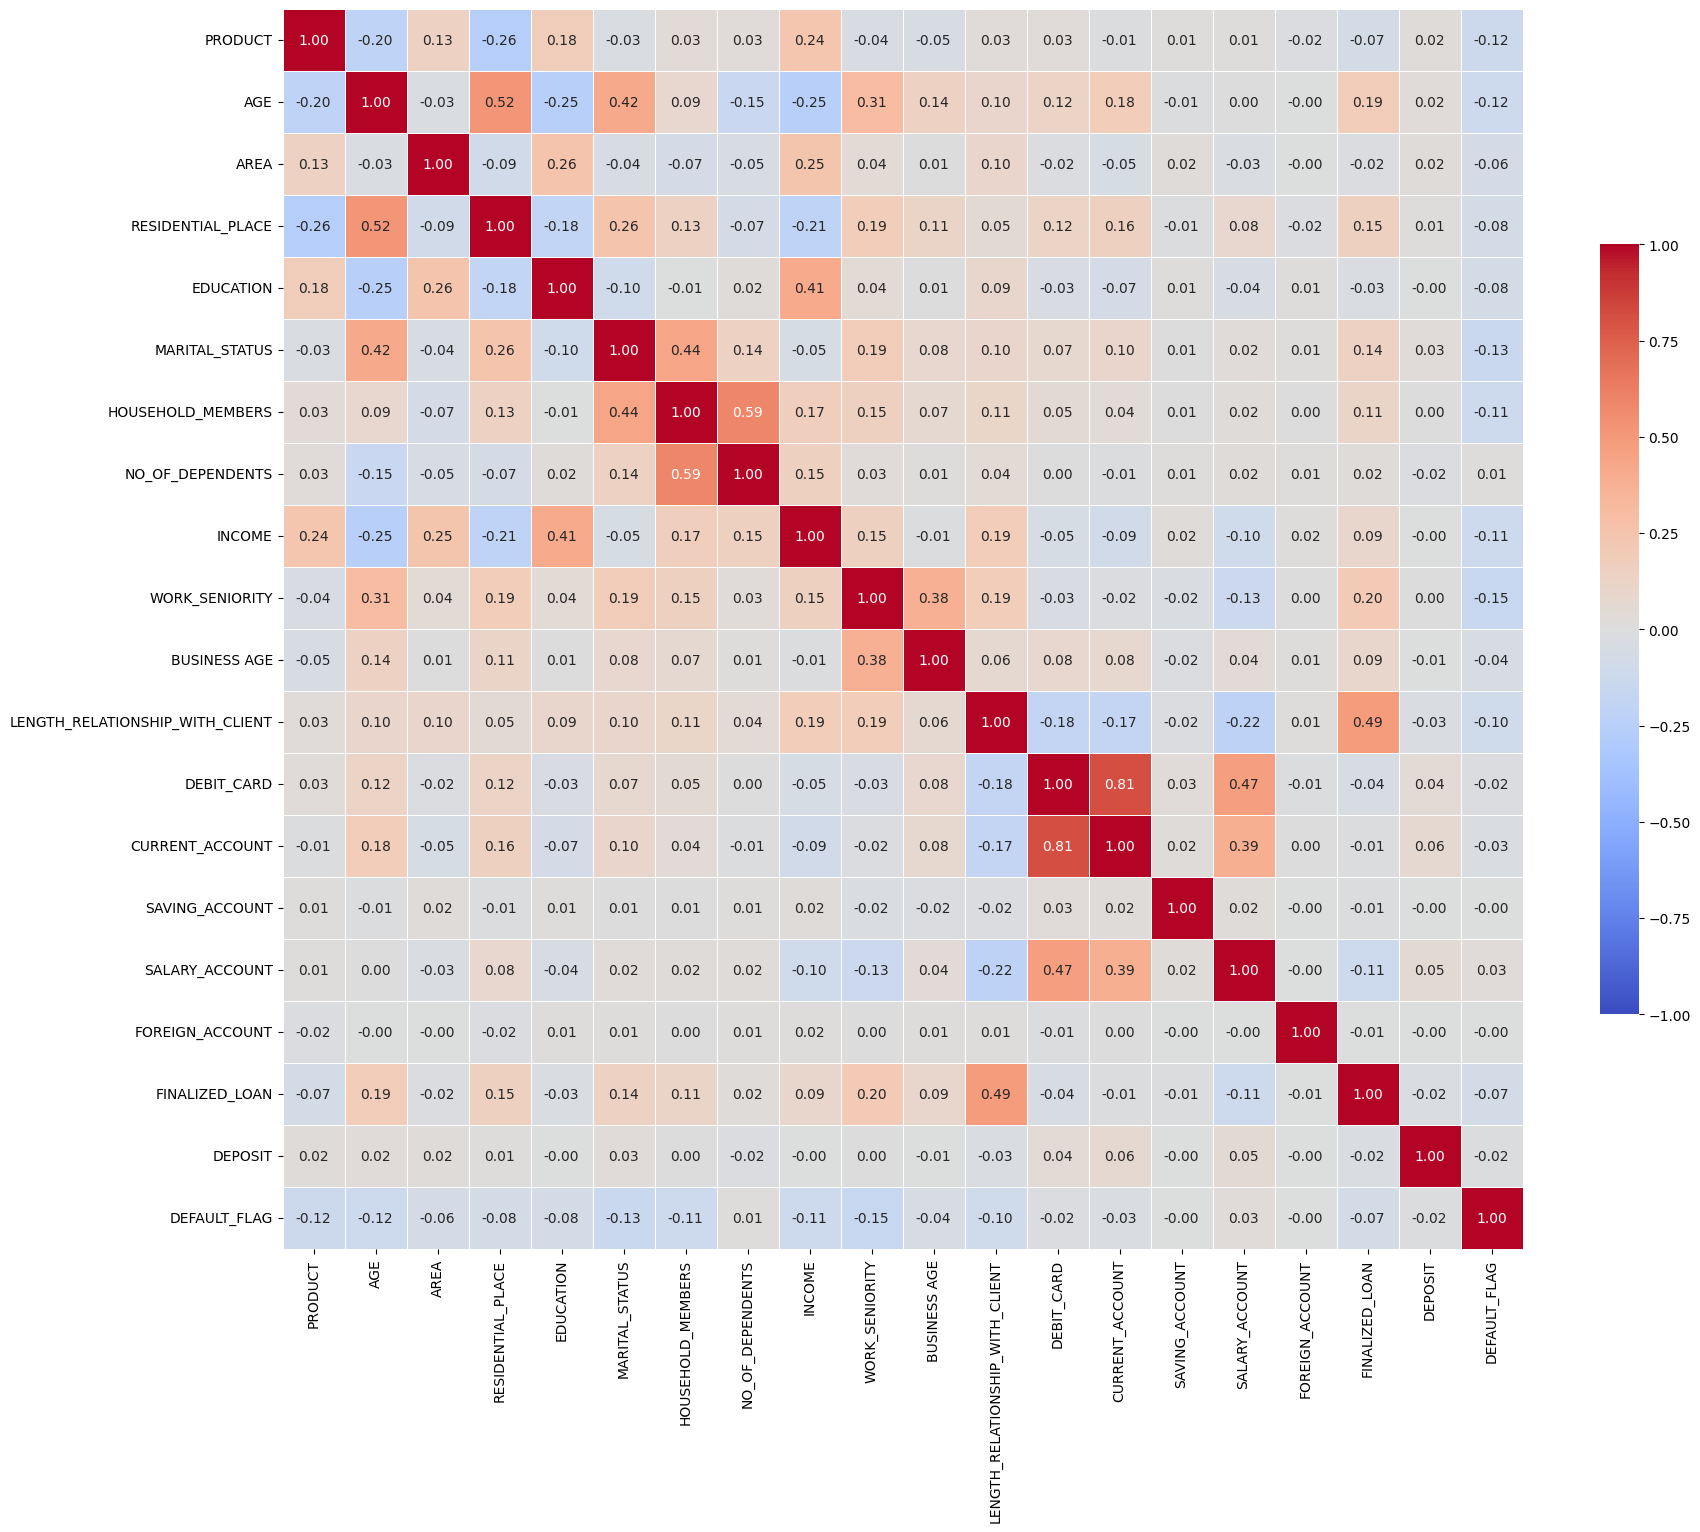

In [11]:
df_train = df_train.drop(columns = ["PENSION_FUNDS","ECONOMIC_SECTOR","EMPLOYEE_NO"])

correlation_matrix = df_train.corr('spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

plt.show()